In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Vehicle Detection using SVMs
===

### Feature Visualization

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import time

from default_params import *
#from hog_features import *
#from color_features import *
from feature_ex import *
from utils import *


%matplotlib inline

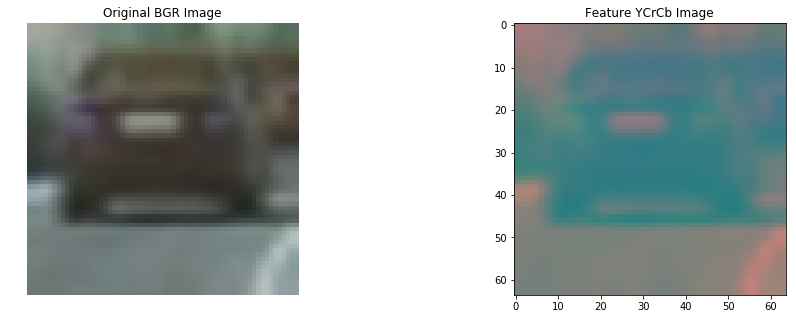

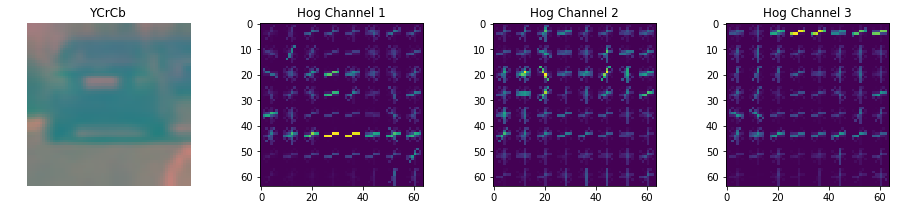

In [3]:
image = cv2.imread('../data/vehicles/GTI_Far/image0001.png')
hog_channel = DEFAULT_HOG_CHANNEL
cspace = DEFAULT_CSPACE
feature_image = convert2color (image, cspace)

fig, axis = plt.subplots(1, 2, figsize=(16, 5))
axis[0].set_title('Original BGR Image')
axis[0].imshow(image)
axis[0].axis('off')
axis[1].set_title('Feature YCrCb Image')
axis[1].imshow(feature_image)
plt.savefig('output_images/ycrcb_feature_img.jpg')
            
hog_features = []
hog_images = []
# Call get_hog_features() with vis=False, feature_vec=True
if hog_channel == 'ALL':
    for channel in range(feature_image.shape[2]):
        features, hog_image = get_hog_features(feature_image[:,:,channel], 
                                DEFAULT_ORIENT, DEFAULT_PIX_PER_CELL, DEFAULT_CELL_PER_BLOCK, 
                                vis=True, feature_vec=True)
        hog_features.append (features)        
        hog_images.append (hog_image)
    hog_features = np.ravel(hog_features)        
else:
        features, hog_image = get_hog_features(feature_image[:,:,hog_channel], DEFAULT_ORIENT, 
                                        DEFAULT_PIX_PER_CELL, DEFAULT_CELL_PER_BLOCK, vis=True, feature_vec=True)

        hog_features.append (features)
        hog_images.append (hog_image)

fig, axis = plt.subplots(1, 4, figsize=(16, 3))
axis[0].set_title('YCrCb')
axis[0].imshow(feature_image)
axis[0].axis('off')
count =1
for himage in hog_images :
    axis[count].set_title ('Hog Channel {}'.format (count))
    axis[count].imshow (himage)
    count += 1
plt.savefig('output_images/hog_features_img.jpg')

Shape =(2,), (2,), (2,)


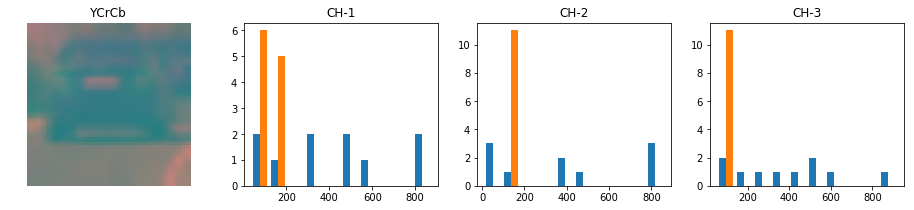

In [4]:
fig, axis = plt.subplots(1, 4, figsize=(16, 3))
axis[0].set_title('YCrCb')
axis[0].imshow(feature_image)
axis[0].axis('off')

channel1_hist = np.histogram(feature_image[:,:,0])
channel2_hist = np.histogram(feature_image[:,:,1])
channel3_hist = np.histogram(feature_image[:,:,2])
print ("Shape ={}, {}, {}".format (np.shape (channel1_hist), np.shape (channel2_hist), np.shape (channel3_hist)))
axis[1].set_title('CH-1')
axis[1].hist(channel1_hist)

axis[2].set_title('CH-2')
axis[2].hist(channel2_hist)

axis[3].set_title('CH-3')
axis[3].hist(channel3_hist)

plt.savefig('output_images/colorspace_histogram.jpg')

Shape =(1024,), (1024,), (1024,)


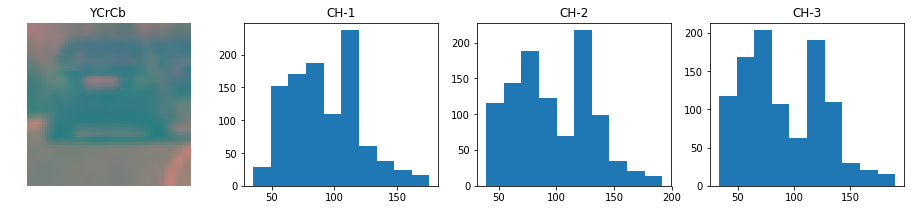

In [5]:
size=DEFAULT_SPATIAL_SIZE
color1 = cv2.resize(image[:,:,0], size).ravel()    
color2 = cv2.resize(image[:,:,1], size).ravel()
color3 = cv2.resize(image[:,:,2], size).ravel()
print ("Shape ={}, {}, {}".format (np.shape (color1), np.shape (color2), np.shape (color3)))
fig, axis = plt.subplots(1, 4, figsize=(16, 3))
axis[0].set_title('YCrCb')
axis[0].imshow(feature_image)
axis[0].axis('off')
axis[1].set_title('CH-1')
axis[1].hist(color1)

axis[2].set_title('CH-2')
axis[2].hist(color2)

axis[3].set_title('CH-3')
axis[3].hist(color3)

plt.savefig('output_images/spatialbin_histogram.jpg')